<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO">

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map"/>

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
from plotly.offline import plot
import matplotlib.pyplot as plt 

In [2]:
uber_apr14=pd.read_csv("uber-trip-data/uber-raw-data-apr14.csv")
uber_apr14=uber_apr14.rename(columns={"Date/Time":"date_time"})
uber_apr14.date_time=pd.to_datetime(uber_apr14.date_time)

In [3]:
uber_apr14["month"]=uber_apr14.date_time.dt.month
uber_apr14["day"]=uber_apr14.date_time.dt.day
uber_apr14["hour"]=uber_apr14.date_time.dt.hour
uber_apr14["minute"]=uber_apr14.date_time.dt.minute

In [24]:
uber_apr14.head()

,date_time,Lat,Lon,Base,month,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,33


In [25]:
sample=uber_apr14.iloc[:500,:]
sample=sample.sort_values("date_time",ascending=True)

# Plotly mapbox with days

In [32]:


fig = px.scatter_mapbox(
    uber_apr14, lat="Lat", lon="Lon",
    color="Base", color_continuous_scale=px.colors.sequential.Pinkyl,
    hover_name="date_time",           
    mapbox_style='dark', zoom=1,
    animation_frame=uber_apr14.day
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plot(fig,filename="mapbo_days.html")

'mapbo_days.html'

# Plotly mapbox with hours

In [34]:
fig = px.scatter_mapbox(
    uber_apr14, lat="Lat", lon="Lon",
    color="Base", color_continuous_scale=px.colors.sequential.Pinkyl,
    hover_name="date_time",           
    mapbox_style='dark', zoom=1,
    animation_frame=uber_apr14.hour
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plot(fig,filename="mapbx_hours.html")

'mapbx_hours.html'

# Clustering with Kmeans

In [35]:
uber_apr14.head()

,date_time,Lat,Lon,Base,month,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,33


In [93]:
X=uber_apr14.iloc[:,1:]

In [94]:
from sklearn.preprocessing import OneHotEncoder

drop_enc = OneHotEncoder(drop='first').fit(X.Base.values.reshape(-1,1))
Xbase=drop_enc.transform(X.Base.values.reshape(-1,1))

In [95]:
X.head()

,Lat,Lon,Base,month,day,hour,minute
0,40.7690,-73.9549,B02512,4,1,0,11
1,40.7267,-74.0345,B02512,4,1,0,17
2,40.7316,-73.9873,B02512,4,1,0,21
3,40.7588,-73.9776,B02512,4,1,0,28
4,40.7594,-73.9722,B02512,4,1,0,33


In [96]:
X["Base_1"]=Xbase.toarray()[:,0]
X["Base_2"]=Xbase.toarray()[:,1]
X["Base_3"]=Xbase.toarray()[:,2]
X["Base_4"]=Xbase.toarray()[:,3]

In [97]:
X=X.drop(columns=["Base"])

In [98]:
X.head()

,Lat,Lon,month,day,hour,minute,Base_1,Base_2,Base_3,Base_4
0,40.7690,-73.9549,4,1,0,11,0.0,0.0,0.0,0.0
1,40.7267,-74.0345,4,1,0,17,0.0,0.0,0.0,0.0
2,40.7316,-73.9873,4,1,0,21,0.0,0.0,0.0,0.0
3,40.7588,-73.9776,4,1,0,28,0.0,0.0,0.0,0.0
4,40.7594,-73.9722,4,1,0,33,0.0,0.0,0.0,0.0


## Kmeans with lat, lon, month, day, hour, base

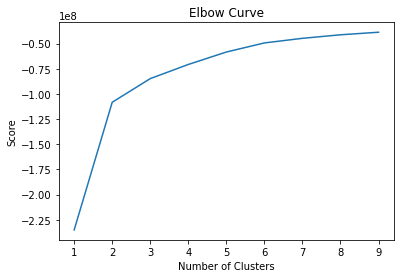

In [80]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 : optimal cluster with lat, lon, Base , month, day, hour

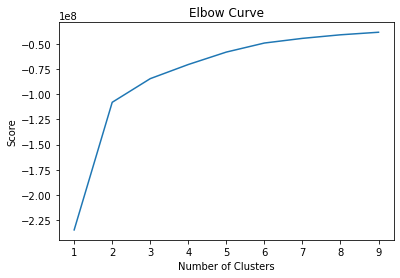

In [83]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=X.drop(columns=["Base_1","Base_2","Base_3","Base_4"])
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 : optimal cluster with lat, lon , month, day, hour

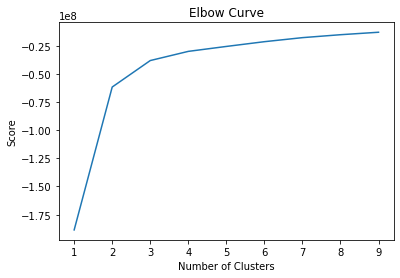

In [84]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=X.drop(columns=["Base_1","Base_2","Base_3","Base_4","month","day"])
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 : optimal cluster with lat, lon , hour, minute

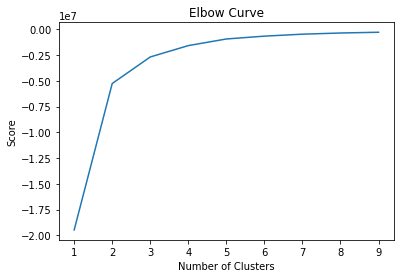

In [99]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=X.drop(columns=["Base_1","Base_2","Base_3","Base_4","month","day","minute"])
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 : optimal cluster with lat, lon , hour

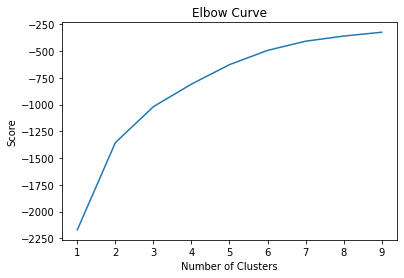

In [100]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=X.drop(columns=["Base_1","Base_2","Base_3","Base_4","month","day","minute","hour"])
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 : optimal cluster with lat, lon 

## Kmeans with lat, lon, hour

In [101]:
X.head()

,Lat,Lon,month,day,hour,minute,Base_1,Base_2,Base_3,Base_4
0,40.7690,-73.9549,4,1,0,11,0.0,0.0,0.0,0.0
1,40.7267,-74.0345,4,1,0,17,0.0,0.0,0.0,0.0
2,40.7316,-73.9873,4,1,0,21,0.0,0.0,0.0,0.0
3,40.7588,-73.9776,4,1,0,28,0.0,0.0,0.0,0.0
4,40.7594,-73.9722,4,1,0,33,0.0,0.0,0.0,0.0


In [103]:
X_new=X.drop(columns=["Base_1","Base_2","Base_3","Base_4","month","day","minute"])
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(X_new) # Compute k-means clustering.
X_new['cluster_label'] = kmeans.fit_predict(X_new)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_new.iloc[:,:-1]) # Labels of each point
X_new.head(10)

,Lat,Lon,hour,cluster_label
0,40.7690,-73.9549,0,1
1,40.7267,-74.0345,0,1
2,40.7316,-73.9873,0,1
3,40.7588,-73.9776,0,1
4,40.7594,-73.9722,0,1
5,40.7383,-74.0403,0,1
6,40.7223,-73.9887,0,1
7,40.7620,-73.9790,0,1
8,40.7524,-73.9960,0,1
9,40.7575,-73.9846,1,1


In [105]:
X_new.cluster_label.value_counts()

0    379023
1    185493
Name: cluster_label, dtype: int64

In [121]:


fig = px.scatter_mapbox(
    X_new, lat="Lat", lon="Lon",
    color=X_new["cluster_label"].apply(lambda x:"cluster 0" if x==1 else "cluster 1").values,
    hover_name="hour",           
    mapbox_style='dark', zoom=3,
    animation_frame=X_new.hour
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plot(fig)

'temp-plot.html'

on drop Base,month,minute

# Feature engineering 

In [124]:
uber_apr14.head()

,date_time,Lat,Lon,Base,month,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,33


In [4]:
new_df=uber_apr14.drop(columns=["Base","minute","date_time","month"])

In [5]:
hourly_count=new_df.groupby(["day","hour"]).count()["Lat"].reset_index() # count of ubers every hour
hourly_count=hourly_count.rename(columns={"Lat":"hourly_count"})


In [6]:
daily_count=new_df.groupby(["day"]).count()["Lat"].reset_index() # count of ubers every day 
daily_count=daily_count.rename(columns={"Lat":"daily_count"})

In [7]:
hourly_daily=pd.merge(hourly_count, daily_count, on='day')
new_df=pd.merge(hourly_daily, new_df,how="right", on=['day','hour'])

In [8]:
new_df

,day,hour,hourly_count,daily_count,Lat,Lon
0,1,0,138,14546,40.7690,-73.9549
1,1,0,138,14546,40.7267,-74.0345
2,1,0,138,14546,40.7316,-73.9873
3,1,0,138,14546,40.7588,-73.9776
4,1,0,138,14546,40.7594,-73.9722
...,...,...,...,...,...,...
564511,30,23,895,36251,40.7640,-73.9744
564512,30,23,895,36251,40.7629,-73.9672
564513,30,23,895,36251,40.7443,-73.9889
564514,30,23,895,36251,40.6756,-73.9405


## Kmeans with lat, lon , hourly_count, daily_count

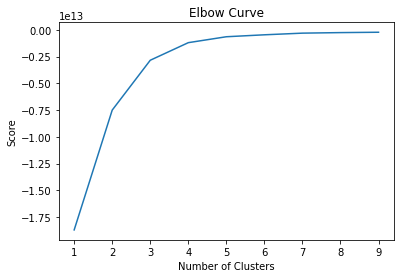

In [247]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=new_df[["Lat","Lon","hourly_count","daily_count"]]
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

3 ou 4 :  optimal cluster with lat, lon , hourly_count, daily_count => 2 after analysis

In [235]:

kmeans = KMeans(n_clusters = 2, init ='k-means++') # 2 après analyse
kmeans.fit(input_) # Compute k-means clustering.
new_df['cluster_label'] = kmeans.fit_predict(input_)
new_df

,day,hour,hourly_count,monthly_count,Lat,Lon,cluster_label
0,1,0,138,14546,40.7690,-73.9549,0
1,1,0,138,14546,40.7267,-74.0345,0
2,1,0,138,14546,40.7316,-73.9873,0
3,1,0,138,14546,40.7588,-73.9776,0
4,1,0,138,14546,40.7594,-73.9722,0
...,...,...,...,...,...,...,...
564511,30,23,895,36251,40.7640,-73.9744,1
564512,30,23,895,36251,40.7629,-73.9672,1
564513,30,23,895,36251,40.7443,-73.9889,1
564514,30,23,895,36251,40.6756,-73.9405,1


In [236]:


fig = px.scatter_mapbox(
    new_df, lat="Lat", lon="Lon",
    color=new_df["cluster_label"].apply(lambda x:"cluster 0" if x==0 else "cluster 1" if x==1 else "cluster 2").values,
    hover_name="day",           
    mapbox_style='dark', zoom=3,
    animation_frame=[str(x) for x in list(zip(new_df.day,new_df.hour))]
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plot(fig)

'temp-plot.html'

## Kmeans with lat, lon , hourly_count

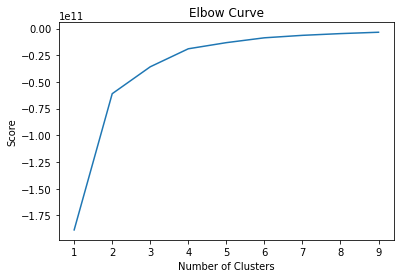

In [249]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=new_df[["Lat","Lon","hourly_count"]]
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 ou 3 :  optimal cluster with lat, lon , hourly_count 

In [250]:

kmeans = KMeans(n_clusters = 2, init ='k-means++') # 2 après analyse
kmeans.fit(input_) # Compute k-means clustering.
new_df['cluster_label'] = kmeans.fit_predict(input_)
new_df

,day,hour,hourly_count,daily_count,Lat,Lon,cluster_label
0,1,0,138,14546,40.7690,-73.9549,1
1,1,0,138,14546,40.7267,-74.0345,1
2,1,0,138,14546,40.7316,-73.9873,1
3,1,0,138,14546,40.7588,-73.9776,1
4,1,0,138,14546,40.7594,-73.9722,1
...,...,...,...,...,...,...,...
564511,30,23,895,36251,40.7640,-73.9744,1
564512,30,23,895,36251,40.7629,-73.9672,1
564513,30,23,895,36251,40.7443,-73.9889,1
564514,30,23,895,36251,40.6756,-73.9405,1


In [252]:

fig = px.scatter_mapbox(
    new_df, lat="Lat", lon="Lon",
    color=new_df["cluster_label"].apply(lambda x:"cluster 0" if x==0 else "cluster 1" if x==1 else "cluster 2").values,
    hover_name="day",           
    mapbox_style='dark', zoom=3,
    animation_frame=new_df.hour
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plot(fig)

'temp-plot.html'

## Kmeans with lat, lon , daily_count

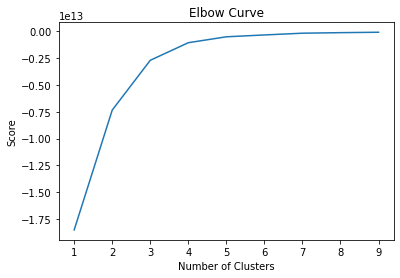

In [253]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
input_=new_df[["Lat","Lon","daily_count"]]
score = [kmeans[i].fit(input_).score(input_) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

2 ou 3 :  optimal cluster with lat, lon , hourly_count 

In [254]:

kmeans = KMeans(n_clusters = 2, init ='k-means++') # 2 après analyse
kmeans.fit(input_) # Compute k-means clustering.
new_df['cluster_label'] = kmeans.fit_predict(input_)
new_df

,day,hour,hourly_count,daily_count,Lat,Lon,cluster_label
0,1,0,138,14546,40.7690,-73.9549,0
1,1,0,138,14546,40.7267,-74.0345,0
2,1,0,138,14546,40.7316,-73.9873,0
3,1,0,138,14546,40.7588,-73.9776,0
4,1,0,138,14546,40.7594,-73.9722,0
...,...,...,...,...,...,...,...
564511,30,23,895,36251,40.7640,-73.9744,1
564512,30,23,895,36251,40.7629,-73.9672,1
564513,30,23,895,36251,40.7443,-73.9889,1
564514,30,23,895,36251,40.6756,-73.9405,1


In [255]:

fig = px.scatter_mapbox(
    new_df, lat="Lat", lon="Lon",
    color=new_df["cluster_label"].apply(lambda x:"cluster 0" if x==0 else "cluster 1" if x==1 else "cluster 2").values,
    hover_name="day",           
    mapbox_style='dark', zoom=3,
    animation_frame=new_df.day
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plot(fig)

'temp-plot.html'